# Timeseries Analysis

1) Plotting a time series <br>
2) Plotting 2 time series <br>
3) Correlation between 2 time series <br>
4) Mean Reversion <br>
5) Autocorrelation - Mean Reversion or Trending relation <br>

##  Correlation and Autocorrelation

In [94]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Plotting a time series

                 Close
Date                  
2010-01-04  113.330002
2010-01-05  113.629997
2010-01-06  113.709999
2010-01-07  114.190002
2010-01-08  114.570000


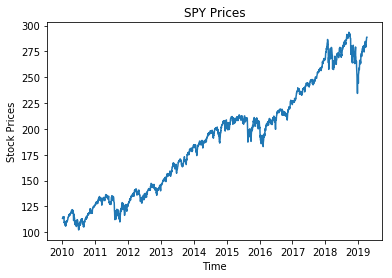

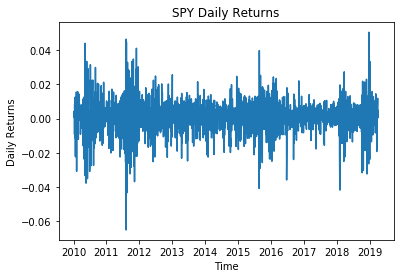

In [95]:
def data_clean(name):
    file_name="data/"+name+".csv"
    data=pd.read_csv(file_name)[['Date','Close']]
    data.index=pd.to_datetime(data['Date'])
    del data['Date']
    return data

spy=data_clean("SPY")
print(spy.head(5))

plt.plot(spy['Close'])
plt.title('SPY Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

spy_returns=spy.pct_change()
plt.plot(spy_returns)
plt.title('SPY Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()


### PLotting 2 time series together

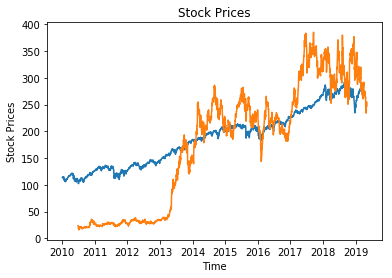

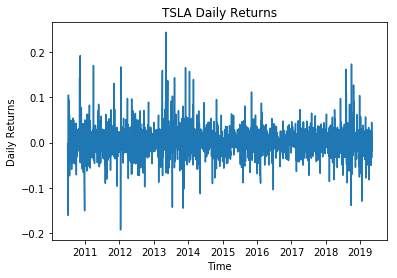

In [96]:
tsla=data_clean("TSLA")
tsla_returns=tsla.pct_change()


plt.plot(spy['Close'])
plt.plot(tsla['Close'])
plt.title('Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.show()

plt.plot(tsla_returns)
plt.title('TSLA Daily Returns')
plt.xlabel('Time')
plt.ylabel('Daily Returns')
plt.show()

In [97]:
spy=spy[spy.index>='2010-06-29']
tsla=tsla[tsla.index<='2019-04-08']

spy_returns=spy.pct_change()
tsla_returns=tsla.pct_change()

### Correlation between 2 stocks

Correlation between stocks
0.9432631536781562
Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns
Correlation between stock returns
0.35866609839304164
The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction


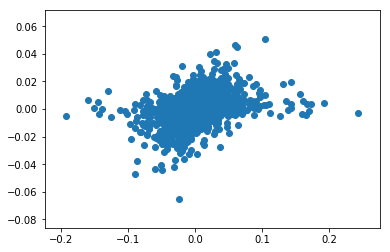

In [108]:

print("Correlation between stocks")
print(tsla['Close'].corr(spy['Close']))
print("Correlation between prices of two stocks will always be high. To find the correct correlation we need to find relation between stock returns")


print("Correlation between stock returns")
print(tsla_returns['Close'].corr(spy_returns['Close']))


print("The +ve correlation tells that both SPY and TSLA move in same direction, a correlation of 0.35 is not that high. A -ve correlation would have told us that 2 assets move in opposite direction")

plt.scatter(tsla_returns['Close'],spy_returns['Close'])

plt.show()

### Mean reversion strategy over different time intervals

The correlation between 2 prices(A & B) change from time to time. Lets say that on <br>
Day T the correlation is : 0.85 over a daily horizon <br>
On Day (T+2) Company A announces it's bad quartely results the price tanks and the correlation is now 0.34. A smart investor would know that Stock A is temporarily down. He would study such past intances when the correlation between 2 stocks deviated from it's normal and how quickly the Correlation recovered, thus he will buy A or can also sell B considering that the sector is performing bad thus hoping to see same correlation.<br>
The study needs to be done on different number of time horizon of 1 Day to an (365 days) an Year to have a full understanding of the behavior of assets

### Auto-Correlation of time series with itself with just 1 lag

An auto correlation of a stock price with itself will tell us about a stock nature. <br>
1) -ve Auto Correlation suggests a Mean Reversion behavior <br>
2) +ve Auto Correlation suggests a trending behavior of time series <br> 

Let's analyze TSLA behavior, I believe that it will be -ve auto correlation, let's check my belief on a time scale of 1 day to 1 Year

In [109]:
# Compute Daily Autcorrelation on daily levels

def autocorrelation_method(data,rules):
    # Compute the percentage change of prices
    temp = data.resample(rule=rules).last()
    returns = temp.pct_change()
    # Compute and print the autocorrelation of returns
    autocorrelation = returns['Close'].autocorr()
    return autocorrelation

print("Autocorrelation for TSLA for Daily, Weekly, Monthly and Yearly")
print("The autocorrelation of daily returns is %4.7f" %(autocorrelation_method(tsla,'B')))
print("The autocorrelation of weekly returns is %4.7f" %(autocorrelation_method(tsla,'W')))
print("The autocorrelation of monthly returns is %4.7f" %(autocorrelation_method(tsla,'M')))
print("The autocorrelation of annual returns is %4.7f" %(autocorrelation_method(tsla,'A')))

print("***********")

print("Autocorrelation for SPY for Daily, Weekly, Monthly and Yearly")
print("The autocorrelation of daily returns is %4.7f" %(autocorrelation_method(spy,'B')))
print("The autocorrelation of weekly returns is %4.7f" %(autocorrelation_method(spy,'W')))
print("The autocorrelation of monthly returns is %4.7f" %(autocorrelation_method(spy,'M')))
print("The autocorrelation of annual returns is %4.7f" %(autocorrelation_method(spy,'A')))

print("SPY shows a bit of mean reversion for all time periods, though it's not much strong")

Autocorrelation for TSLA for Daily, Weekly, Monthly and Yearly
The autocorrelation of daily returns is -0.0028575
The autocorrelation of weekly returns is 0.0162873
The autocorrelation of monthly returns is 0.1117104
The autocorrelation of annual returns is -0.0291968
***********
Autocorrelation for SPY for Daily, Weekly, Monthly and Yearly
The autocorrelation of daily returns is -0.0313929
The autocorrelation of weekly returns is -0.1102021
The autocorrelation of monthly returns is -0.1796418
The autocorrelation of annual returns is -0.2080017
SPY shows a bit of mean reversion for all time periods, though it's not much strong


### Any serious non zero auto correlation signifies that the series can be predicted from the past data.

### Plotting and analyzing Autocorrelation function with more than 1 lags

Let's say we have quarterly earnings for HRB company, we want to see if we can predict the earnigs using the ACF

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


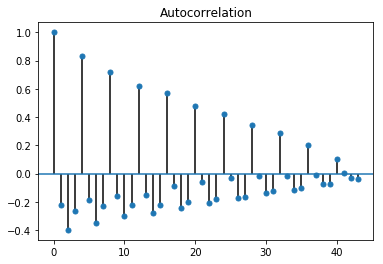

There is a high ACF on lags of 4,8,12,16,20.. earnings


In [110]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

HRB_data=pd.read_csv('data/HRB.csv')[['Earnings']]

acf_array=acf(HRB_data)
print(acf_array)

plot_acf(HRB_data,alpha=1)
plt.show()

print("There is a high ACF on lags of 4,8,12,16,20.. earnings")

### Lets look at auto corr for SPY with Lags and find confidence it's mean reversion confidence

The autocorrelation of weekly returns is -0.110
It tells it's a mean reverting behavior but how sure are we of this result. Is this statisitical significant?. In other words is there less than 5% chance that we will observer a negative autocorrelation if true autocorrelation was really 0. Are there any other autocorrelation at other lags that are significantly different from 0.
The approximate confidence interval is +/- 0.04


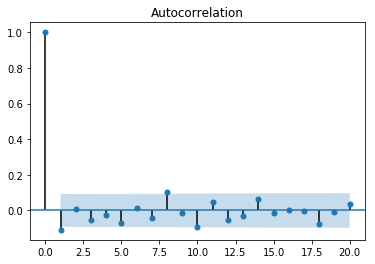

In [111]:
temp=spy.resample(rule='W').last()
returns=temp.pct_change()
res=returns['Close'].autocorr()
print("The autocorrelation of weekly returns is %4.3f" %res)

print("It tells it's a mean reverting behavior but how sure are we of this result. Is this statisitical significant?. In other words is there less than 5% chance that we will observer a negative autocorrelation if true autocorrelation was really 0. Are there any other autocorrelation at other lags that are significantly different from 0.")

nobs=len(spy)
conf=1.96/np.sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))


# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns['Close'].dropna(), alpha=0.05,lags=20)
plt.show()

## White Noise

AQR capital released a paper which discussed how effective is ML in financial markets and predictions. I have shared the link below. One of the most important line in it was about the ratio between the Signals and Noise is very low, because of which it becomes difficult to identify the right alpha source.

https://www.institutionalinvestor.com/article/b1fsn64kfq8b5h/AQR-s-Problem-With-Machine-Learning-Cats-Morph-Into-Dogs

Characterstics of White Noise :
1) Mean,Variance constant with time
2) 0 Autocorrelation for all lags

Special case of white noise 
1) Is white noise has normal distribution, it's Gaussian white noise.

A white noise time series is a sequence of uncorrelated identically distributed variables which have 0 auto-correlation and therefore we can't use past values to predict future data. Stock prices are also modelled as white noises and among that white noise we look for alpha.

Only the best of the best can find the alpha in a hay stack of white noise with methods like Magnet,Wind which for a quant is it's ability to think in a wild approach beyond limits and vigrous testing of many sources and methods


0.01939520150512469
0.04926697574277818


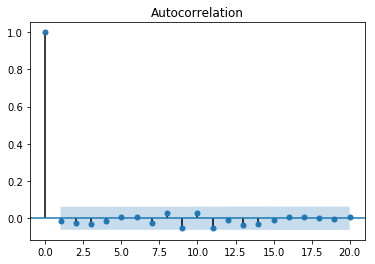

The autocorrelation is almost 0 for all the lags


In [114]:
returns=np.random.normal(loc=0.02,scale=0.05,size=1000)
print(np.mean(returns))
print(np.std(returns))

plot_acf(returns,alpha=0.05,lags=20)
plt.show()

print("The autocorrelation is almost 0 for all the lags")

### Random Walk 

If the stocks are considered as random walk than we can assume that the returns are white noises. Tomorrows' price will be todays price + white noise. 

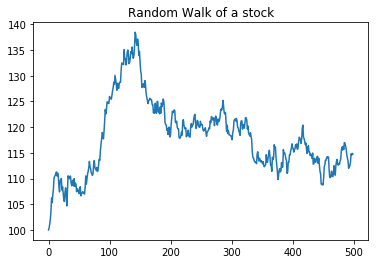

In [115]:
steps=np.random.normal(loc=0,scale=1,size=500)
steps[0]=0

P=100+np.cumsum(steps)
plt.plot(P)
plt.title('Random Walk of a stock')
plt.show()

### Adding drift to model

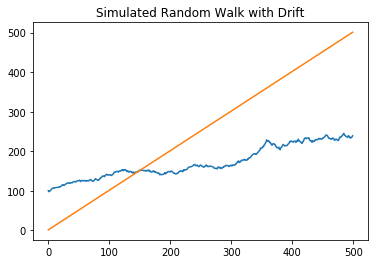

In [124]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")

plt.plot(np.cumsum(steps))
plt.show()


### Checking if stock price is a random walk

A p-value of less than 0.05 is needed to reject the null hypothesis that the stock prices follow a random walk.

In [130]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(tsla['Close'])
print(result)

print("P-Value = {}".format(result[1]))

print("Since P value is 0.55 we can't reject the null hypothesis and we say Yes the stock follows random walk")

(-1.4513032260315697, 0.5574488668652147, 0, 2208, {'1%': -3.433315089967454, '5%': -2.862849884866555, '10%': -2.567467315304361}, 14105.594655725694)
P-Value = 0.5574488668652147
Since P value is 0.55 we can't reject the null hypothesis and we say Yes the stock follows random walk


### Check if retutns follow random walk

In [139]:
tsla_returns=tsla.pct_change()
tsla_returns=tsla_returns.dropna()
result=adfuller(tsla_returns['Close'])
print(result)
print("P-Value = {}".format(result[1]))

print("So the movement of returns is not a random walk, since we can reject the null hypothesis of returns being a random walk")

(-47.0421003995378, 0.0, 0, 2207, {'1%': -3.433316435028347, '5%': -2.8628504787773705, '10%': -2.567467631521733}, -8800.62385924378)
P-Value = 0.0
So the movement of returns is not a random walk, since we can reject the null hypothesis of returns being a random walk


## Stationarity

1) Entire distribution of data is time-invariant<br>
2) Mean, Variance, Autocorrelation are time invariant(Autocorrelation(P(T),P(T-tao)) is only a function of tao)

Random walk is not a stationary time series, the uncertainy of stock pricec tomorrow is not same as uncertainity of prices 10 Years from now. Seasonal series are also non-stationary, mean varies with over time. 

Non-stationary series can be made stationary by taking log or diff().

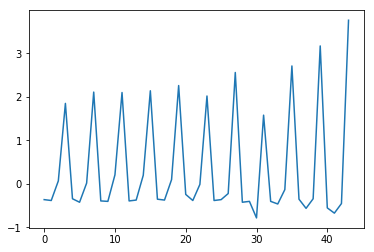

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


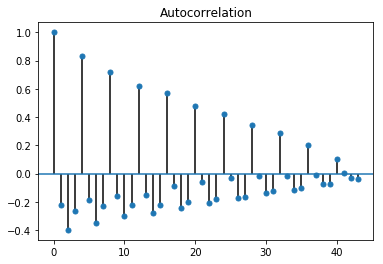

   Earnings
0       NaN
1       NaN
2       NaN
3       NaN
4      0.02
5     -0.04
6     -0.05
7      0.26
8     -0.05
9      0.02
by seasonally adjusting the series, the seasonal pattern in autocorrelation was removed


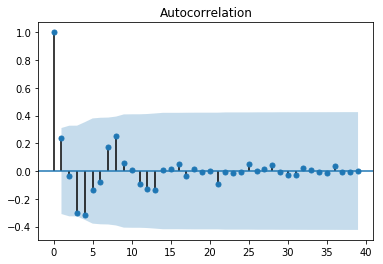

In [147]:
# So we know HRBsa has seasonality 

plt.plot(HRB_data)
plt.show()

acf_array=acf(HRB_data)
print(acf_array)

plot_acf(HRB_data,alpha=1)
plt.show()


# Seasonally adjust quarterly earnings
HRBsa = HRB_data.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

# Drop the NaN data in the first three three rows
HRBsa = HRBsa.dropna()

print("by seasonally adjusting the series, the seasonal pattern in autocorrelation was removed")
# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

## Autoregressive(AR) Models


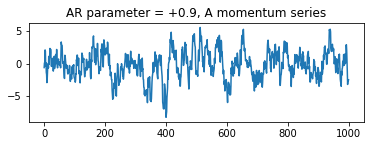

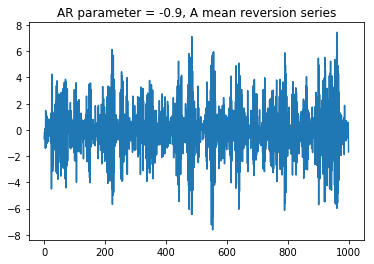

In [152]:
from statsmodels.tsa.arima_process import ArmaProcess


#Plot 1: AR parameter =+0.9
plt.subplot(2,1,1)
ar1=np.array([1,-0.9])
ma1=np.array([1])
AR_object1=ArmaProcess(ar1,ma1)
simulated_data_1=AR_object1.generate_sample(nsample=1000)
plt.title("AR parameter = +0.9, A momentum series")
plt.plot(simulated_data_1)
plt.show()

# Plot 2: AR parameter = -0.9
ar2=np.array([1,+0.9])
ma2=np.array([1])
AR_object2=ArmaProcess(ar2,ma2)
simulated_data_2=AR_object2.generate_sample(nsample=1000)
plt.title("AR parameter = -0.9, A mean reversion series")
plt.plot(simulated_data_2)
plt.show()




### Comparing ACF for serveral time series +0.9, -0.9 and 0.3

P(T)= μ + Φ.P(T-t) + ε

μ = mean <br>
Φ = ACF parameters, (+0.9,-0.9,0.3) <br>
ε = white noise

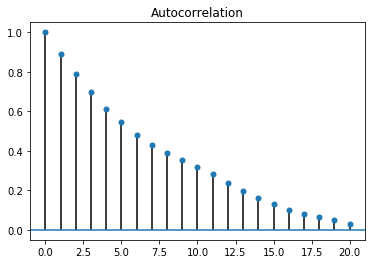

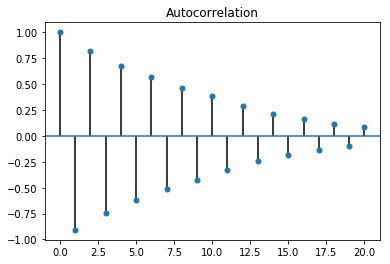

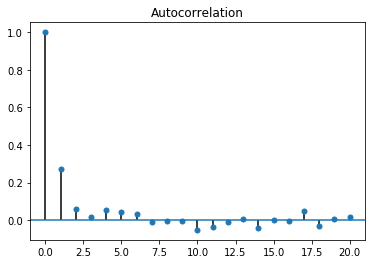

AR models with different parameters


In [156]:
ar3=np.array([1,-0.3])
ma3=np.array([1])
AR_object3=ArmaProcess(ar3,ma3)
simulated_data_3=AR_object3.generate_sample(nsample=1000)

plot_acf(simulated_data_1,alpha=1,lags=20)
plt.show()

plot_acf(simulated_data_2,alpha=1,lags=20)
plt.show()

plot_acf(simulated_data_3,alpha=1,lags=20)
plt.show()

print("AR models with different parameters")

### Estimating and forecasting AR Model

In [162]:
from statsmodels.tsa.arima_model import ARMA
mod=ARMA(simulated_data_1,order=(1,0))
res=mod.fit()

print(res.summary())
print("Paramaters")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1397.806
Method:                       css-mle   S.D. of innovations              0.978
Date:                Tue, 18 Jun 2019   AIC                           2801.611
Time:                        12:08:01   BIC                           2816.334
Sample:                             0   HQIC                          2807.207
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2330      0.284     -0.820      0.412      -0.790       0.324
ar.L1.y        0.8920      0.014     62.733      0.000       0.864       0.920
                                    Roots           

### Predicting using ARMA model

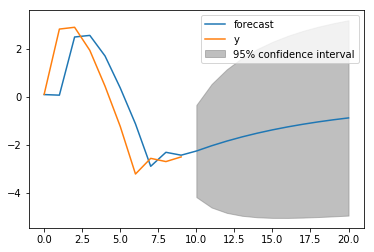

In [166]:
mod=ARMA(simulated_data_1,order=(1,0))
res=mod.fit()
res.plot_predict(start=990,end=1010)
plt.show()

### 10 Year Treasury Rate prediction

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


Ignore the warnings they are just telling you that start and end which I used for plot_predict should be given as dates since my series index is date, however you can positions too for plotting
                              ARMA Model Results                              
Dep. Variable:                  DGS10   No. Observations:                 1251
Model:                     ARMA(1, 0)   Log Likelihood                2190.830
Method:                       css-mle   S.D. of innovations              0.042
Date:                Tue, 18 Jun 2019   AIC                          -4375.659
Time:                        14:36:52   BIC                          -4360.264
Sample:                             0   HQIC                         -4369.872
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         

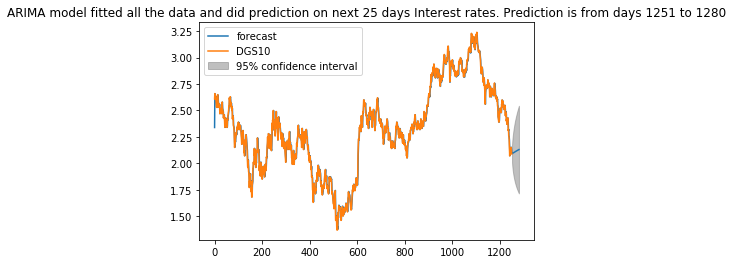

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


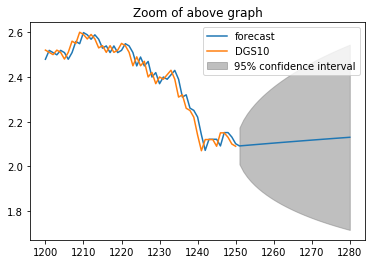

In [263]:
data=pd.read_csv("data/DGS10.csv")
data.index=pd.to_datetime(data['DATE'])
del data['DATE']

r=data['DGS10']

mod=ARMA(r,order=(1,0))
res=mod.fit()
print("Ignore the warnings they are just telling you that start and end which I used for plot_predict should be given as dates since my series index is date, however you can positions too for plotting")
print(res.summary())

res.plot_predict(start=0,end=1280)
plt.title("ARIMA model fitted all the data and did prediction on next 25 days Interest rates. Prediction is from days 1251 to 1280")
plt.show()


res.plot_predict(start=1200,end=1280)
plt.title("Zoom of above graph")
plt.show()


### Estimate order of Model: Information Criteria

to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. 

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and s

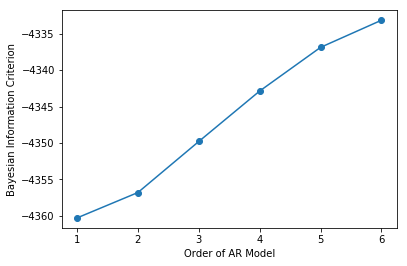

In [273]:
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(r, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

I am getting all negative values for BIC, I visited Stackexchange to see if it's correct. Here is the link.

https://stats.stackexchange.com/questions/84076/negative-values-for-aic-in-general-mixed-model

So our ARMA model fits best with AR(1) kind of model since it has the lowest value of BIC

### MA Model

#### MA(1) Time Series

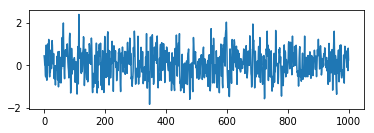

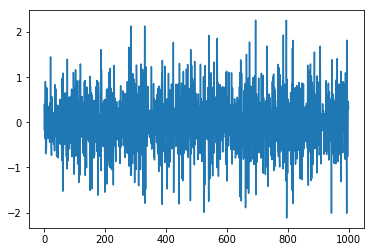

In [283]:
from statsmodels.tsa.arima_process import ArmaProcess
plt.subplot(2,1,1)
ar1=np.array([2])
ma1=np.array([1,+0.9])
MA_object1=ArmaProcess(ar1,ma1)
simulated_data_1=MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.show()

ar2=np.array([2])
ma2=np.array([1,-0.9])
MA_object2=ArmaProcess(ar2,ma2)
simulated_data_2=MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()



The two different AM models produce a very different time series plot, but we can identify most of the differences in the acf plot of two MA

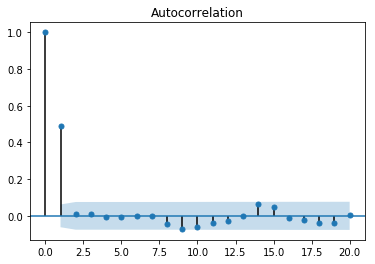

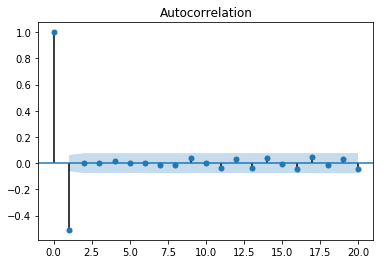

In [284]:
plot_acf(simulated_data_1,lags=20)
plt.show()

plot_acf(simulated_data_2,lags=20)
plt.show()

### Estimating & Forecasting MA Model on Simulated data and than Ineterst Rates

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood                -694.025
Method:                       css-mle   S.D. of innovations              0.484
Date:                Tue, 18 Jun 2019   AIC                           1394.051
Time:                        16:04:20   BIC                           1408.774
Sample:                             0   HQIC                          1399.646
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0709      0.029      2.459      0.014       0.014       0.127
ma.L1.y        0.8840      0.015     60.685      0.000       0.855       0.913
                                    Roots           

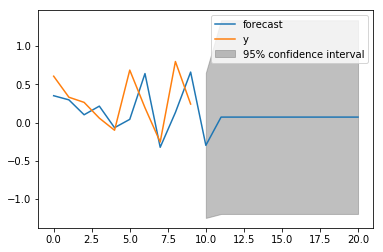

******* MA Interest Rates*****


C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  DGS10   No. Observations:                 1251
Model:                     ARMA(0, 1)   Log Likelihood                 125.296
Method:                       css-mle   S.D. of innovations              0.219
Date:                Tue, 18 Jun 2019   AIC                           -244.591
Time:                        16:04:21   BIC                           -229.196
Sample:                             0   HQIC                          -238.804
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3356      0.012    197.592      0.000       2.312       2.359
ma.L1.DGS10     0.9119      0.008    111.721      0.000       0.896       0.928
                                    Roots       

C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Program Files\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


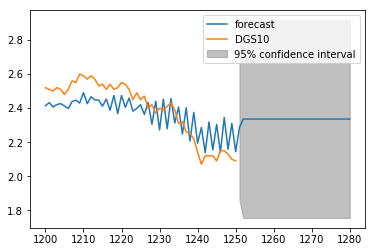

In [293]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

print("******* MA Interest Rates*****")

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(r, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(r, order=(0,1))
res = mod.fit()
res.plot_predict(start=1200, end=1280)
plt.show()